In [134]:
Introduction

The data come from the Kaggle dataset Car Features and MSRP of Kaggle. It describes almost 12 000 car models sold 
in the USA between 1990 and 2018 with the market price (new or used) and some features. 


In [ ]:
Explanation of MPG(a column in a data)

A measure of how far a car can travel if you put just one gallon of petrol or diesel in its tank.

In [ ]:
Explanation on MSRP(a column in a data)

MSRP is the manufacturer's suggested retail price, a price recommended for the sale of an item in all retail outlets. 
A vendor can require retailers to sell its products at the MSRP and refuse to sell its products to a discounter if they 
price products below it.

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline 
import missingno as msno

In [76]:
df = pd.read_csv('C:/Users/HHI/Desktop/Hemra/Data science/Springboard/data/Cars_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [77]:
df.shape

(11914, 16)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [79]:
# We will drop some unnecessary columns which we will not use for our analysis.

df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [80]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [81]:
# There 989 duplicated rows which we can drop to clean data.
df = df.drop_duplicates()
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [82]:
df.count()

Make                 10925
Model                10925
Year                 10925
Engine HP            10856
Engine Cylinders     10895
Transmission Type    10925
Driven_Wheels        10925
highway MPG          10925
city mpg             10925
MSRP                 10925
dtype: int64

<AxesSubplot:>

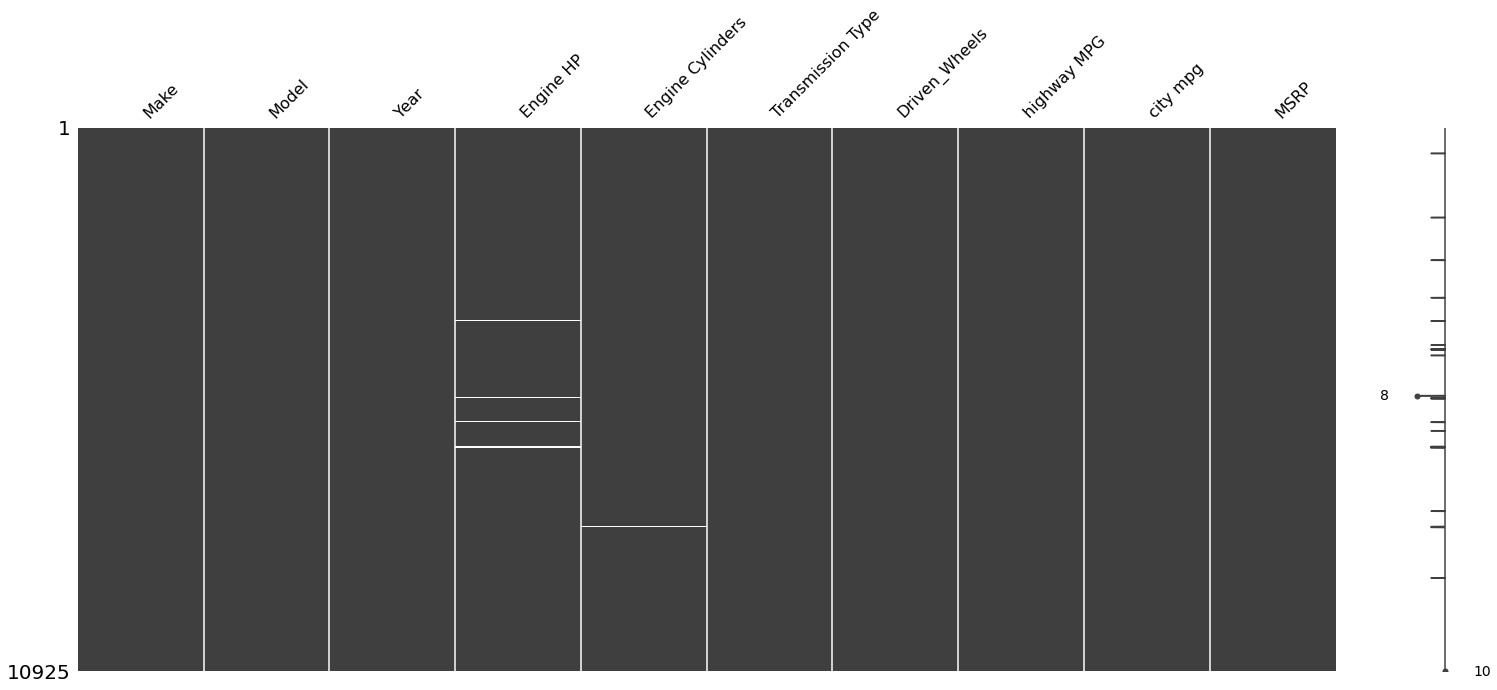

In [83]:
# Let's visulize missing values by a chart
msno.matrix(df)

In [84]:
df.isna().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [85]:
Dropping the missing or null values.

In many cases the missing values are replaced with the mean or the average of that column, 
but in this case, I just dropped that missing values. 
This is because there is nearly 100 missing value compared to 10000 values this is a small number and this 
is negligible so I just dropped those values.

In [86]:
df = df.dropna()
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [87]:
df.count()

Make                 10827
Model                10827
Year                 10827
Engine HP            10827
Engine Cylinders     10827
Transmission Type    10827
Driven_Wheels        10827
highway MPG          10827
city mpg             10827
MSRP                 10827
dtype: int64

In [88]:
print(df.isnull().sum())

Make                 0
Model                0
Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64


In [89]:
Let's work with outliers. We have a few ways to detect and deal with them if any.
Because outliers are one of the primary reasons for resulting in a less accurate model. 
Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called 
IQR score technique. Often outliers can be seen with visualizations using a box plot. 
Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. 
Here, in all the plots, you can find some points are outside the box they are none other than outliers.


<AxesSubplot:xlabel='MSRP'>

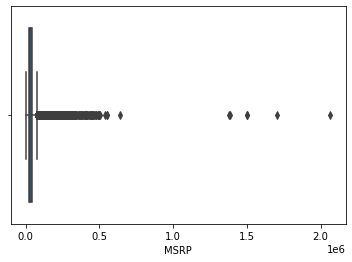

In [92]:
sns.boxplot(x=df['MSRP'])

<AxesSubplot:xlabel='Engine HP'>

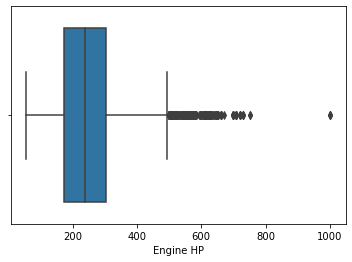

In [93]:
sns.boxplot(x=df['Engine HP'])

<AxesSubplot:xlabel='Engine Cylinders'>

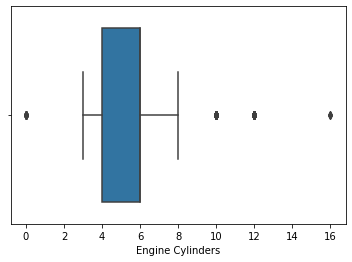

In [94]:
sns.boxplot(x=df['Engine Cylinders'])

In [95]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                    9.0
Engine HP             130.0
Engine Cylinders        2.0
highway MPG             8.0
city mpg                6.0
MSRP                21327.5
dtype: float64


In [96]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9191, 10)

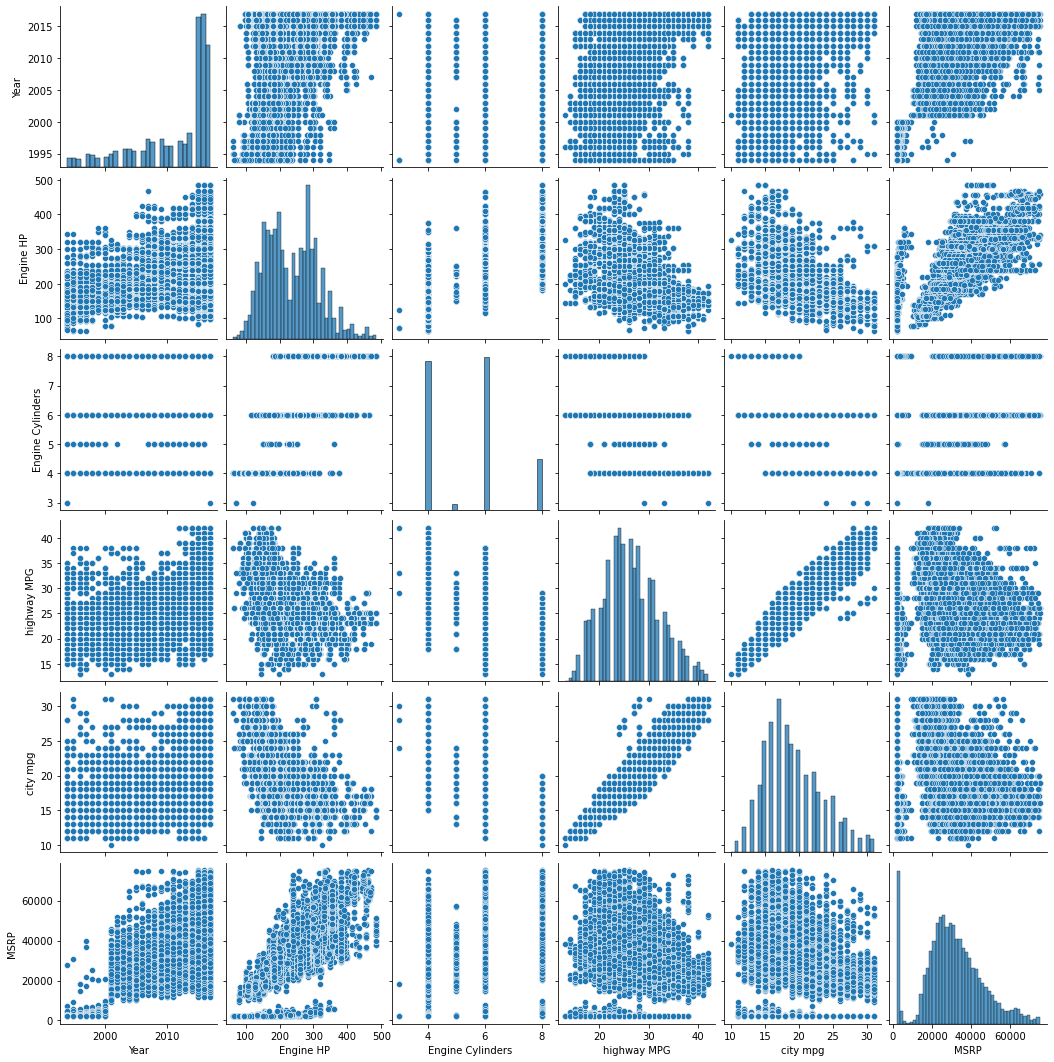

In [97]:
sns.pairplot(df)
plt.rcParams['figure.figsize']=5,5
plt.show()

In [98]:
There are around 1600 rows are outliers. We will keep out data withour them and continue to analyse. 
Heat Maps is a type of plot which is necessary when we need to find the dependent variables. 
One of the best way to find the relationship between the features can be done using heat maps.

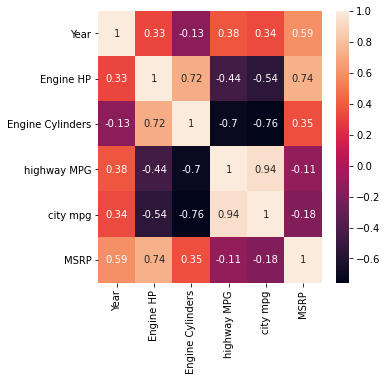

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
Engine HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Engine Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
highway MPG,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
city mpg,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
MSRP,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


In [99]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()
corr

In [100]:
# As you can see above price feature depends mainly on the Horsepower, and Year.

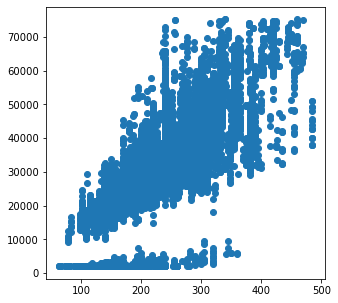

In [101]:
plt.scatter(data=df, x = 'Engine HP', y = 'MSRP')
plt.show()

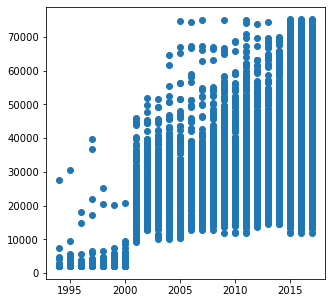

In [102]:
plt.scatter(data=df, x = 'Year', y = 'MSRP')
plt.show()

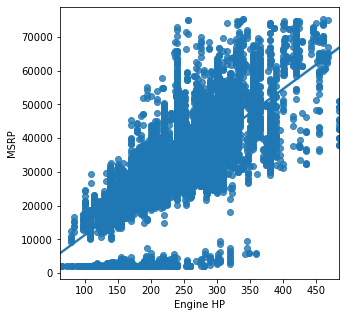

In [103]:
sns.regplot(data=df, x = 'Engine HP', y = 'MSRP')
plt.rcParams['figure.figsize']=10,10
plt.show()

In [104]:
from scipy.stats import linregress
linregress(df['Engine HP'], df['MSRP'])

LinregressResult(slope=144.23596030789489, intercept=-3169.267485645538, rvalue=0.7390417803724829, pvalue=0.0, stderr=1.3715477494961292)

In [105]:
from sklearn.model_selection import train_test_split
# Subsetting our data into our dependent and independent variables.
X=df[['Engine HP']]
y=df[['MSRP']]
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [106]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6893, 1) (6893, 1)
(2298, 1) (2298, 1)


In [107]:
from sklearn import linear_model, preprocessing
rModel=linear_model.LinearRegression(normalize=True)

In [108]:
rModel=linear_model.LinearRegression(normalize=True)

In [109]:
rModel_results=rModel.fit(X_train,y_train)

In [110]:
# Evaluate the model  
rModel.score(X_train,y_train)

0.5510767346348926

In [111]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

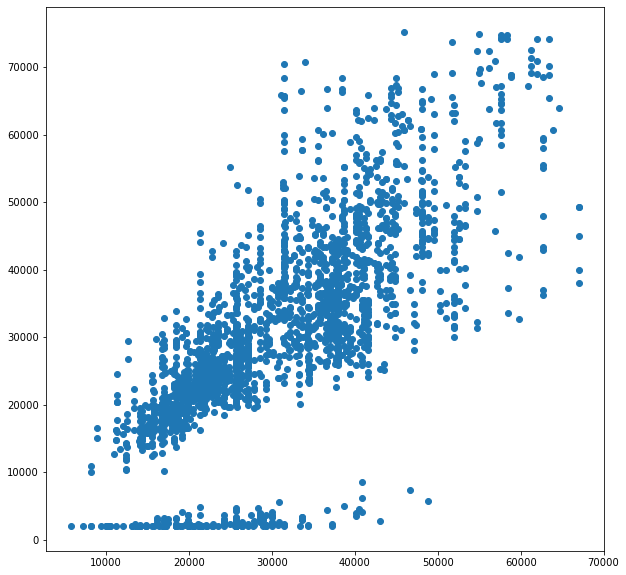

In [112]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_pred, y_test)

In [113]:
#The above scatterplot represents how well the predictions match the actual results.

In [114]:
#Making a Linear Regression model: Ordinary Least Squares (OLS)
import statsmodels.api as sm
X=df[['Engine HP']]
y=df[['MSRP']]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [115]:
# Create the model
rModel2 = sm.OLS(y_train, X_train)

# Fit the model with fit() 
rModel2_results=rModel2.fit()

# Evaluate the model with .summary()
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     8459.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:44:22   Log-Likelihood:                -73270.
No. Observations:                6893   AIC:                         1.465e+05
Df Residuals:                    6891   BIC:                         1.466e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3340.4714    391.561     -8.531      0.000   -4108.051   -2572.892
Engine HP    145.0227      1.577     91.973      0.000     141.932     148.114
==============================================================================
Omnibus:                      519.493   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1118.192
Skew:                          -0.492   Prob(JB):                    1.54e-243
Kurtosis:                       4.710   Cond. No.                         807.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

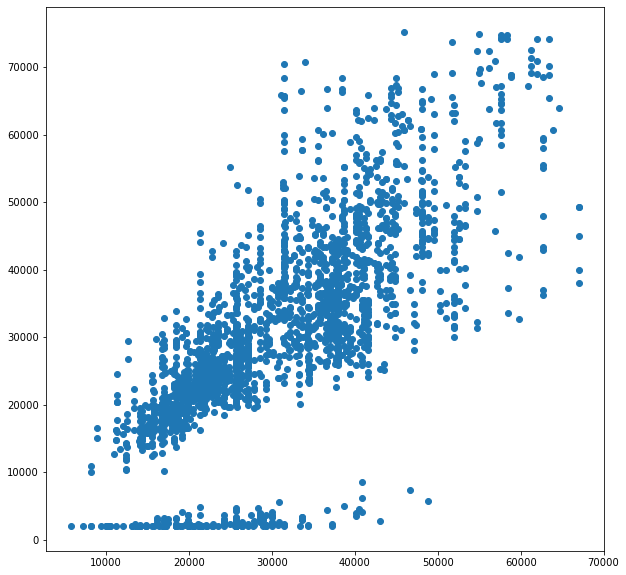

In [116]:
y_pred = rModel2_results.predict(X_test)
# Plot the predictions
# Build a scatterplot
plt.scatter(y_pred, y_test)
plt.show()

In [132]:
# Create test and train datasets
# Include the remaining columns as predictors
X = df[['Year','Engine Cylinders','highway MPG','city mpg']]

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)

# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [137]:
# Create the fifth model
rModel3 = sm.OLS(y_train, X_train)
# Fit the model
rModel3_result = rModel5.fit()
# Evaluate the model
rModel3_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     2165.
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:58:32   Log-Likelihood:                -73224.
No. Observations:                6893   AIC:                         1.465e+05
Df Residuals:                    6888   BIC:                         1.465e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.261e+06    4.2e+04    -77.593      0.000   -3.34e+06   -3.18e+06
Year              1633.3323     21.128     77.305      0.000    1591.914    1674.750
Engine Cylinders  3363.7302    135.144     24.890      0.000    3098.806    3628.655
highway MPG        452.1221     62.755      7.205      0.000     329.104     575.141
city mpg         -1194.9604     88.033    -13.574      0.000   -1367.531   -1022.389
==============================================================================
Omnibus:                      533.034   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              673.365
Skew:                           0.709   Prob(JB):                    6.04e-147
Kurtosis:                       3.579   Cond. No.                     7.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
def get_top(feature):
    popular=df[['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Driven_Wheels','highway MPG','city mpg','MSRP']]\
                    .sort_values(by=feature,ascending=False).set_index(feature).reset_index().head(10)
    return popular


In [124]:
get_top('Engine HP')

,Engine HP,Make,Model,Year,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,485.0,Dodge,Charger,2015,8.0,AUTOMATIC,rear wheel drive,25,15,47995
1,485.0,Dodge,Charger,2017,8.0,AUTOMATIC,rear wheel drive,25,15,39995
2,485.0,Dodge,Challenger,2015,8.0,MANUAL,rear wheel drive,23,14,37995
3,485.0,Dodge,Challenger,2015,8.0,MANUAL,rear wheel drive,23,14,45695
4,485.0,Dodge,Challenger,2016,8.0,MANUAL,rear wheel drive,23,14,49195
5,485.0,Dodge,Challenger,2016,8.0,MANUAL,rear wheel drive,23,14,37995
6,485.0,Dodge,Challenger,2016,8.0,MANUAL,rear wheel drive,23,14,42795
7,485.0,Dodge,Challenger,2017,8.0,MANUAL,rear wheel drive,23,14,37995
8,485.0,Dodge,Challenger,2017,8.0,MANUAL,rear wheel drive,23,14,49195
9,485.0,Dodge,Challenger,2017,8.0,MANUAL,rear wheel drive,23,14,42795


In [ ]:
#Th most powerful by engine size is Dodge brand with 485 horsepower.

In [126]:
get_top('MSRP')

,MSRP,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg
0,75200,Porsche,Cayman,2015,340.0,6.0,MANUAL,rear wheel drive,26,19
1,75200,Porsche,Cayman,2016,340.0,6.0,MANUAL,rear wheel drive,26,19
2,75195,Chevrolet,Corvette,2017,460.0,8.0,MANUAL,rear wheel drive,25,16
3,75010,Cadillac,STS-V,2007,469.0,8.0,AUTOMATIC,rear wheel drive,19,12
4,74995,Lotus,Exige,2009,257.0,4.0,MANUAL,rear wheel drive,26,20
5,74950,Lotus,Exige,2011,257.0,4.0,MANUAL,rear wheel drive,26,20
6,74850,Mercedes-Benz,CLS-Class,2017,402.0,8.0,AUTOMATIC,rear wheel drive,26,18
7,74800,Porsche,Cayenne,2016,420.0,6.0,AUTOMATIC,all wheel drive,24,17
8,74700,BMW,M4,2017,425.0,6.0,MANUAL,rear wheel drive,26,17
9,74695,Cadillac,Escalade ESV,2015,420.0,8.0,AUTOMATIC,rear wheel drive,21,15


In [ ]:
# The most expensive brand is Porsche and the model is Cayman with 75200 retail price, followed by Chevrolet Corvette.

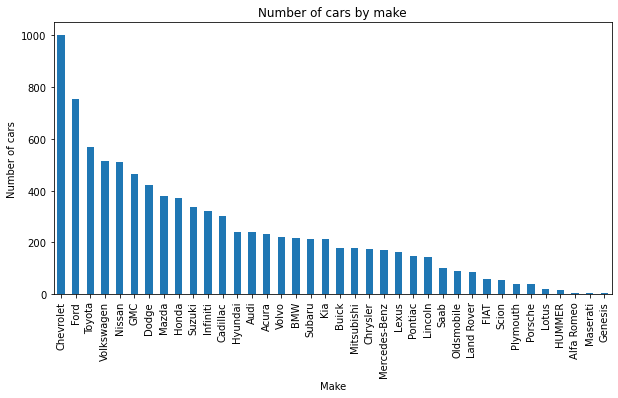

In [47]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

In [ ]:
#Top 3 by make is Chevrolet, Ford and Toyota. The least 3 ones are Genesis, Maseratti and Alfa Romeo.

In [ ]:
Conclusion

The findings from the EDA analysis of the variables and correlations revealed that the strongest positive correlation 
is between the engine horsepower and MSRP(price), which is around 0.74. This makes sense intuitively, as typically 
the more horsepower, the more vehicle costs.

Additionally, there was a moderately strong correlation between the Engine Cylinders variable and the MSRP.
Surprisingly,the year of production of cars and MSRP are less correlated than the Year and Engine HP.

The second, LinearRegression and OLS showed almost the same R_squared results of 0.55 and 0.56. 

It's worth noting that the top 10 by engiene horsepower is Dodge brand.
The most expensive brand is Porsche Cayman with 75200 retail price, followed by Chevrolet Corvette, 
and Cadillac STS-V models.

The top 3 by make is Chevrolet, Ford and Toyota. The least 3 ones are Genesis, Maseratti and Alfa Romeo.

Also, the above scatterplot represented how well the predictions matched the actual results
(scatterplot of LinearRegression) and the scatterplot of the actual data.